# Klasifikasi Fashion MNIST dengan CNN TensorFlow
Dataset Fashion MNIST terdiri dari 70,000 gambar grayscale ukuran 28x28 piksel dalam 10 kategori pakaian. Proyek ini mendemonstrasikan penggunaan Convolutional Neural Network (CNN) untuk klasifikasi gambar menggunakan TensorFlow.

## 1. Import Library
Pertama, kita import library yang diperlukan untuk proyek ini.


In [4]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, callbacks
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix
import pandas as pd
import datetime
from tensorflow.keras.utils import plot_model

# Cek versi TensorFlow
print(f"TensorFlow version: {tf.__version__}")

TensorFlow version: 2.18.0


## 2. Memuat dan Melihat Data
Fashion MNIST berisi 70,000 gambar grayscale (28x28 piksel), terbagi menjadi training set (60,000) dan test set (10,000).


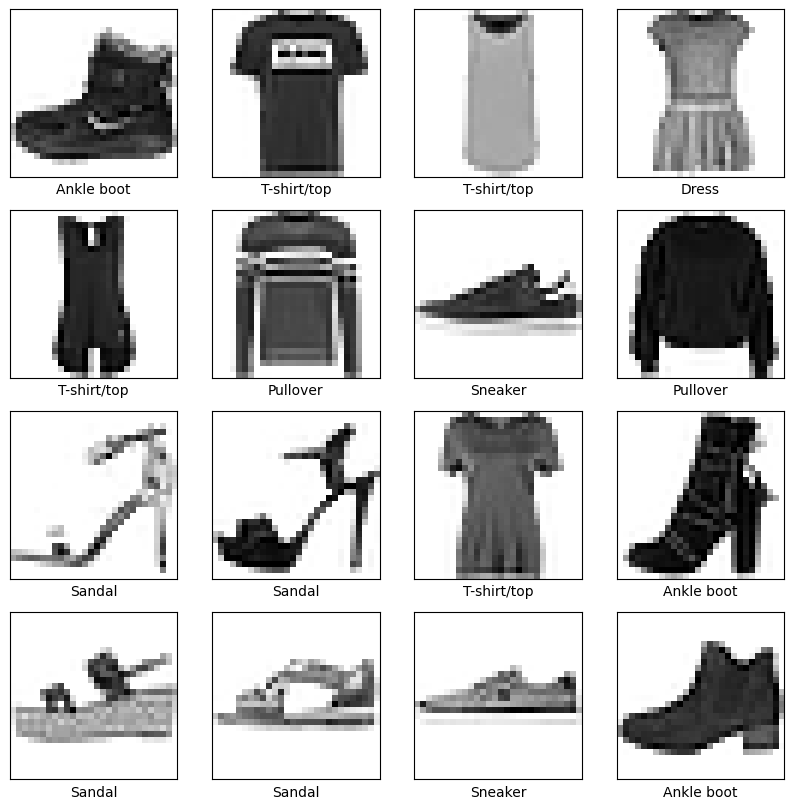


Informasi Dataset Fashion MNIST:
Link Dataset: https://github.com/zalandoresearch/fashion-mnist
Jumlah Total Data: 70,000 gambar
Ukuran Gambar: 28x28 piksel (grayscale)
Jumlah Fitur: 784 (28x28 piksel)
Jumlah Label: 10 kelas
Jumlah Data Training: 60,000
Jumlah Data Testing: 10,000

Kelas yang tersedia:
0: T-shirt/top
1: Trouser
2: Pullover
3: Dress
4: Coat
5: Sandal
6: Shirt
7: Sneaker
8: Bag
9: Ankle boot


In [5]:
# Load dataset Fashion MNIST
(train_images, train_labels), (test_images, test_labels) = datasets.fashion_mnist.load_data()

# Normalisasi nilai pixel (0-1)
train_images = train_images / 255.0
test_images = test_images / 255.0

# Nama kelas untuk label
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Visualisasi sampel gambar
plt.figure(figsize=(10, 10))
for i in range(16):
    plt.subplot(4, 4, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

print("\nInformasi Dataset Fashion MNIST:")
print("================================")
print("Link Dataset: https://github.com/zalandoresearch/fashion-mnist")
print("Jumlah Total Data: 70,000 gambar")
print("Ukuran Gambar: 28x28 piksel (grayscale)")
print("Jumlah Fitur: 784 (28x28 piksel)")
print("Jumlah Label: 10 kelas")
print("Jumlah Data Training: 60,000")
print("Jumlah Data Testing: 10,000")
print("\nKelas yang tersedia:")
for i, class_name in enumerate(class_names):
    print(f"{i}: {class_name}")

## 3. Preprocessing Dataset
Menyiapkan data untuk input CNN dengan menambahkan dimensi kanal warna.

In [3]:
# Reshape dataset untuk dimensi kanal (grayscale = 1 kanal)
train_images = train_images.reshape(-1, 28, 28, 1)
test_images = test_images.reshape(-1, 28, 28, 1)

# Cek bentuk data
print(f"Bentuk data training: {train_images.shape}")
print(f"Bentuk data testing: {test_images.shape}")

Bentuk data training: (60000, 28, 28, 1)
Bentuk data testing: (10000, 28, 28, 1)


## 4. Membuat Arsitektur Model CNN
Membangun arsitektur CNN dengan multiple convolutional layers dan dense layers.

In [9]:
def create_model():
    model = models.Sequential([
        # Input Layer
        layers.Conv2D(32, (3, 3), activation='relu', padding='same', 
                     input_shape=(28, 28, 1), name='conv1_1'),
        layers.BatchNormalization(name='bn1_1'),
        layers.Conv2D(32, (3, 3), activation='relu', padding='same', name='conv1_2'),
        layers.BatchNormalization(name='bn1_2'),
        layers.MaxPooling2D((2, 2), name='pool1'),
        layers.Dropout(0.25, name='dropout1'),
        
        # Hidden Layer 1
        layers.Conv2D(64, (3, 3), activation='relu', padding='same', name='conv2_1'),
        layers.BatchNormalization(name='bn2_1'),
        layers.Conv2D(64, (3, 3), activation='relu', padding='same', name='conv2_2'),
        layers.BatchNormalization(name='bn2_2'),
        layers.MaxPooling2D((2, 2), name='pool2'),
        layers.Dropout(0.25, name='dropout2'),
        
        # Hidden Layer 2
        layers.Conv2D(128, (3, 3), activation='relu', padding='same', name='conv3_1'),
        layers.BatchNormalization(name='bn3_1'),
        layers.MaxPooling2D((2, 2), name='pool3'),
        layers.Dropout(0.25, name='dropout3'),
        
        # Flatten dan Dense Layers
        layers.Flatten(name='flatten'),
        layers.Dense(256, activation='relu', name='dense1'),
        layers.BatchNormalization(name='bn4'),
        layers.Dropout(0.5, name='dropout4'),
        
        # Output Layer
        layers.Dense(10, activation='softmax', name='output')
    ])
    return model

# Buat model
model = create_model()

# Print detail arsitektur model
model.summary()

# Visualisasi arsitektur model
plot_model(model, to_file='model_architecture.png', show_shapes=True, show_layer_names=True)

# Hitung total parameter
total_params = model.count_params()
trainable_params = sum([tf.keras.backend.count_params(w) for w in model.trainable_weights])

print("\nInformasi Detail Model:")
print("=======================")
print(f"Jumlah Total Parameter (Weights + Biases): {total_params:,}")
print(f"Jumlah Parameter yang dapat dilatih: {trainable_params:,}")
print("\nJenis Aktivasi yang digunakan:")
print("- ReLU pada layer konvolusi dan dense")
print("- Softmax pada layer output")
print("\nJenis Optimisasi: Adam")
print("Learning Rate: 0.001")

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1_1 (Conv2D)                │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn1_1 (BatchNormalization)      │ (None, 28, 28, 32)     │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_2 (Conv2D)                │ (None, 28, 28, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn1_2 (BatchNormalization)      │ (None, 28, 28, 32)     │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool1 (MaxPooling2D)            │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout1 (Dropout)              │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2_1 (Conv2D)                │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn2_1 (BatchNormalization)      │ (None, 14, 14, 64)     │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2_2 (Conv2D)                │ (None, 14, 14, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn2_2 (BatchNormalization)      │ (None, 14, 14, 64)     │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool2 (MaxPooling2D)            │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout2 (Dropout)              │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv3_1 (Conv2D)                │ (None, 7, 7, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn3_1 (BatchNormalization)      │ (None, 7, 7, 128)      │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool3 (MaxPooling2D)            │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout3 (Dropout)              │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense1 (Dense)                  │ (None, 256)            │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn4 (BatchNormalization)        │ (None, 256)            │         1,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout4 (Dropout)              │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 438,890 (1.67 MB)

 Trainable params: 437,738 (1.67 MB)

 Non-trainable params: 1,152 (4.50 KB)

You must install pydot (`pip install pydot`) for `plot_model` to work.

Informasi Detail Model:
Jumlah Total Parameter (Weights + Biases): 438,890
Jumlah Parameter yang dapat dilatih: 437,738

Jenis Aktivasi yang digunakan:
- ReLU pada layer konvolusi dan dense
- Softmax pada layer output

Jenis Optimisasi: Adam
Learning Rate: 0.001


## 5. Kompilasi Model
Mengatur optimizer, loss function, dan metrics untuk model.

In [10]:
# Kompilasi model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

## 6. Pelatihan Model
Melatih model dengan callbacks untuk optimasi training.

In [11]:
# Setup Tensorboard dan Training
# Buat direktori untuk log Tensorboard
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(
    log_dir=log_dir,
    histogram_freq=1,
    write_graph=True,
    write_images=True,
    update_freq='epoch'
)

# Callbacks
callbacks_list = [
    tensorboard_callback,
    callbacks.EarlyStopping(
        monitor='val_accuracy',
        patience=5,
        restore_best_weights=True
    ),
    callbacks.ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.1,
        patience=3,
        min_lr=1e-6
    )
]

# Training model
history = model.fit(
    train_images, 
    train_labels,
    epochs=20,
    batch_size=64,
    validation_split=0.2,
    callbacks=callbacks_list,
    verbose=1
)

# Simpan plot history training
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('training_accuracy.png')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.savefig('training_loss.png')
plt.close()

Epoch 1/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 66s 86ms/step - accuracy: 0.7274 - loss: 0.8257 - val_accuracy: 0.8611 - val_loss: 0.3707 - learning_rate: 0.0010
Epoch 2/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 61s 82ms/step - accuracy: 0.8677 - loss: 0.3700 - val_accuracy: 0.8893 - val_loss: 0.2971 - learning_rate: 0.0010
Epoch 3/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 61s 81ms/step - accuracy: 0.8871 - loss: 0.3071 - val_accuracy: 0.9004 - val_loss: 0.2692 - learning_rate: 0.0010
Epoch 4/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 74s 99ms/step - accuracy: 0.9002 - loss: 0.2756 - val_accuracy: 0.9074 - val_loss: 0.2533 - learning_rate: 0.0010
Epoch 5/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 76s 101ms/step - accuracy: 0.9085 - loss: 0.2544 - val_accuracy: 0.9074 - val_loss: 0.2456 - learning_rate: 0.0010
Epoch 6/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 74s 99ms/step - accuracy: 0.9117 - loss: 0.2388 - val_accuracy: 0.9207 - val_loss: 0.2136 - learning_rate: 0.0010
Epoch 7/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 68s 91ms/step - accuracy: 0.9175 - 

## 7. Evaluasi Model
Mengevaluasi performa model pada data testing.


Hasil Evaluasi Model:
Test Accuracy: 0.9349
Test Loss: 0.1874
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


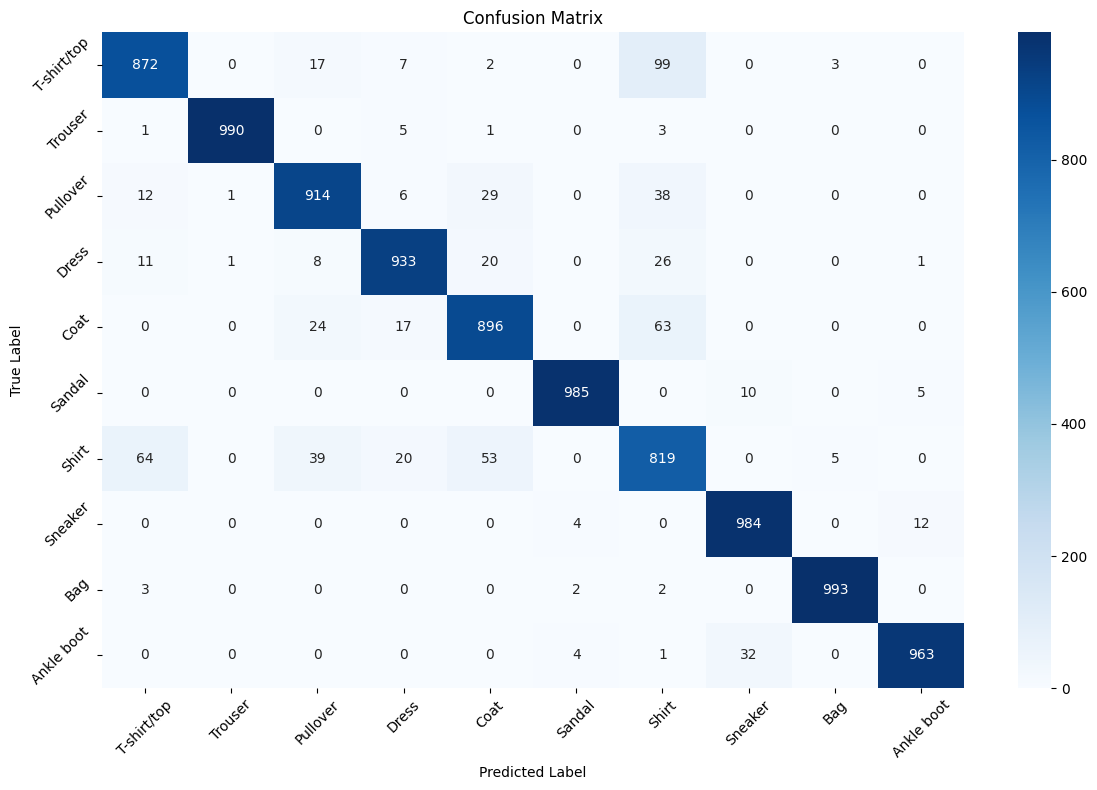

In [18]:
# Evaluasi Model dan Simpan Hasil
# Evaluasi
test_loss, test_accuracy = model.evaluate(test_images, test_labels, verbose=0)
print("\nHasil Evaluasi Model:")
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Loss: {test_loss:.4f}")

# Confusion Matrix
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)
cm = confusion_matrix(test_labels, predicted_labels)

# Plot dan simpan confusion matrix
plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tight_layout()
plt.savefig('confusion_matrix.png')
plt.show()
plt.close()


## 8. Visualisasi Training History
Memplot kurva accuracy dan loss selama proses training.

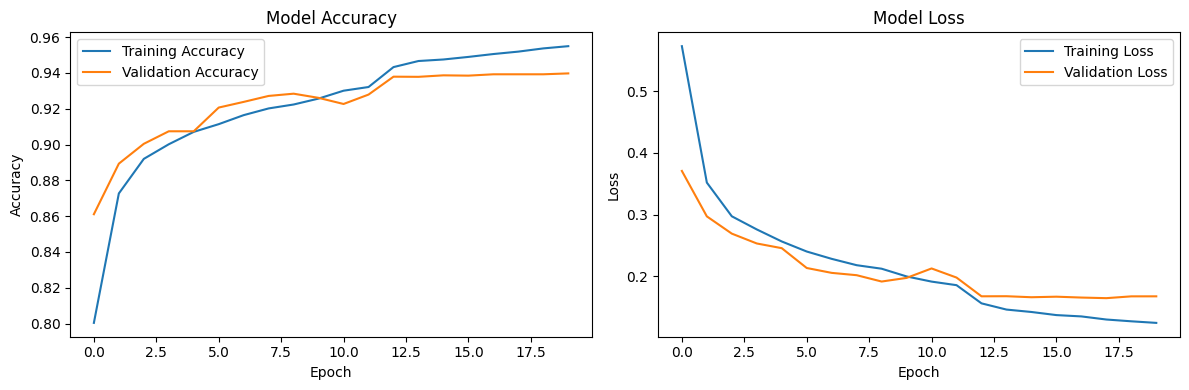

In [15]:
# Plot history training
plt.figure(figsize=(12, 4))

# Plot akurasi
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')

plt.tight_layout()
plt.show()

## 9. Visualisasi Prediksi
Menampilkan hasil prediksi model pada beberapa sampel gambar testing.

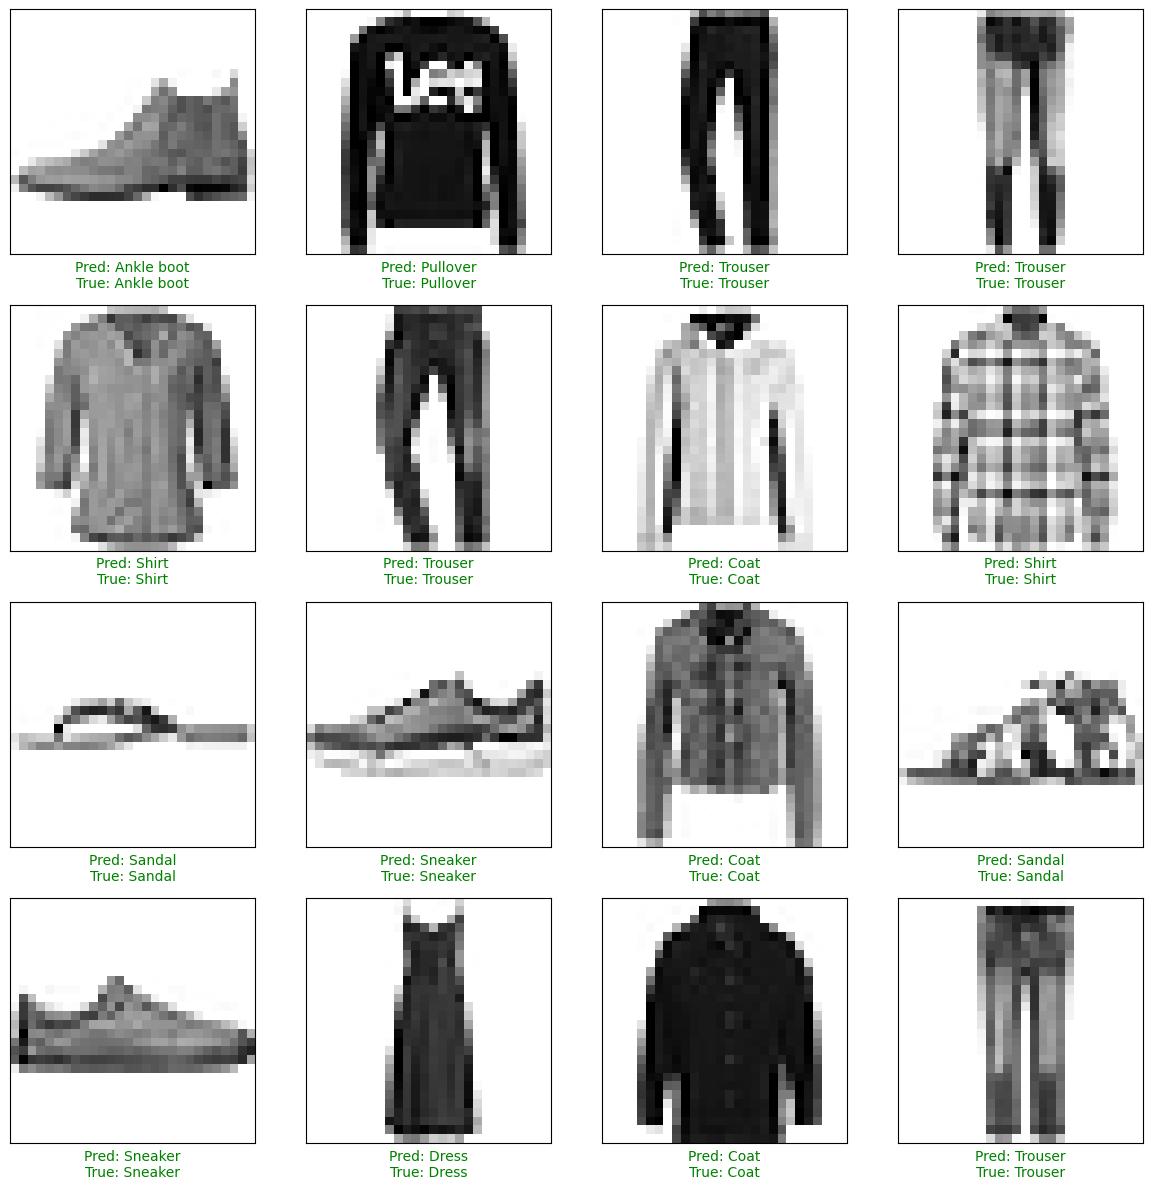

In [16]:
# Visualisasi prediksi
plt.figure(figsize=(12, 12))
for i in range(16):
    plt.subplot(4, 4, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i].reshape(28, 28), cmap=plt.cm.binary)
    
    predicted_label = class_names[np.argmax(predictions[i])]
    true_label = class_names[test_labels[i]]
    color = 'green' if predicted_label == true_label else 'red'
    
    plt.xlabel(f'Pred: {predicted_label}\nTrue: {true_label}', color=color)

plt.tight_layout()
plt.show()

## 10. Menyimpan Model
Menyimpan model yang sudah dilatih untuk penggunaan di masa depan.

In [19]:
# Simpan Model
model.save('fashion_mnist_model.h5')
print("\nModel saved as 'fashion_mnist_model.h5'")

# Simpan ringkasan informasi model ke file
with open('model_summary.txt', 'w') as f:
    model.summary(print_fn=lambda x: f.write(x + '\n'))


Model saved as 'fashion_mnist_model.h5'


In [ ]:
# anduan Penggunaan Tensorboard
print("\nPanduan Melihat Tensorboard:")
print("1. Buka terminal/command prompt")
print("2. Navigasi ke direktori proyek")
print(f"3. Jalankan: tensorboard --logdir {log_dir}")
print("4. Buka browser dan akses: http://localhost:6006")


Panduan Melihat Tensorboard:
1. Buka terminal/command prompt
2. Navigasi ke direktori proyek
3. Jalankan: tensorboard --logdir logs/fit/20241124-000053
4. Buka browser dan akses: http://localhost:6006
